# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [60]:
# Load pickled data
import pickle


# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/carnd/traffic_data_1/train.p'
validation_file= '/home/carnd/traffic_data_1/valid.p'
testing_file = '/home/carnd/traffic_data_1/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train1, y_train1 = train['features'], train['labels']
X_valid1, y_valid1 = valid['features'], valid['labels']
X_test1, y_test1 = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Basic Summary of the Data Set Using Python and Numpy 

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

print('Image Shape = ',image_shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(len(y_train))

Image Shape =  (32, 32, 3)
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
34799


### An exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

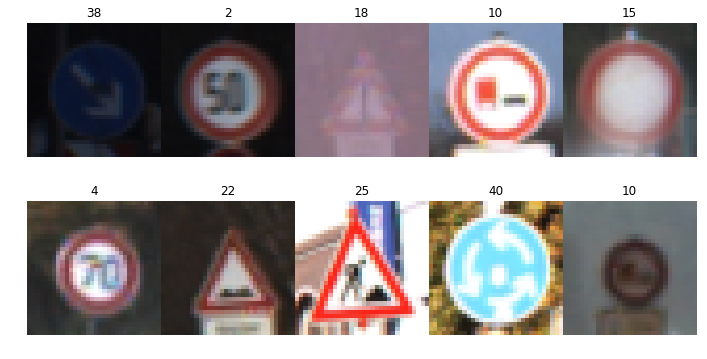

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axs = plt.subplots(2,5, figsize=(12, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])


The above cell shows few examples of the images present in the training data.

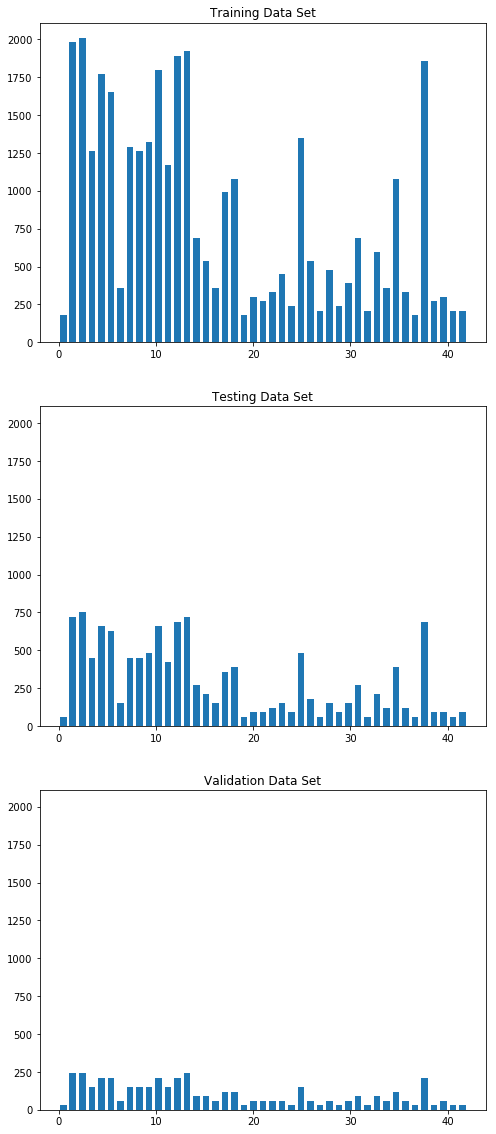

In [61]:
# Visualizing Label data 
# histogram of label frequency
f , (ax1, ax2, ax3) = plt.subplots(3 , sharex = False , sharey = True)
f.set_figheight(20)
f.set_figwidth(8)

hist1, bins = np.histogram(y_train1, bins=n_classes)
hist2, bins = np.histogram(y_test1, bins=n_classes)
hist3, bins = np.histogram(y_valid1, bins=n_classes)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax1.bar(center, hist1, align='center', width=width)
ax1.set_title("Training Data Set")
ax2.bar(center, hist2, align='center', width=width)
ax2.set_title("Testing Data Set")
ax3.bar(center, hist3, align='center', width=width)
ax3.set_title("Validation Data Set")

plt.show()

**Note:** From the above visualization we can note that the frequency of the training data samples for labels is inconsistent, few labels have very high number of samples than compared to others.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set 

You can try different techniques to see if it improves performance. 
- Minimally, the image data should be normalized so that the data has mean zero and equal variance. 
- For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 
- Other pre-processing steps are optional. 


**The following pre-processing was done on the data before proceeding for training:**
 1. Converting to Grayscale
 2. Normalizing the data
 3. Data Augmentation:
     - Random Scaling
     - Random Translation
     - Random Brightness

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

**Converting to Grayscale:**

In [6]:
# Converting to Grayscale

X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)
print('training data mean:',np.mean(X_train))
print('test data mean:',np.mean(X_test))

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)
training data mean: 82.677589037
test data mean: 82.1484603612


**Normalize the train and test datasets to (-1,1):**

In [7]:
# Normalize the train and test datasets to (-1,1)
X_train = X_train_gry
X_test = X_test_gry
X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128


print('After Normalizing')
print('training data mean:',np.mean(X_train_normalized))
print('test data mean:',np.mean(X_test_normalized))

After Normalizing
training data mean: -0.354081335648
test data mean: -0.358215153428


Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


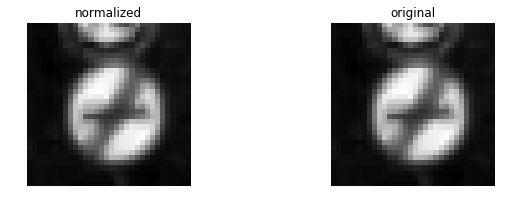

In [8]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

### Data Augmentation:

As noted earlier, few label in the dataset have fewer samples than others. To overcome this problem of limited quantity and limited diversity of data, we generate(manufacture) our own data with the existing data which we have. This methodology of generating our own data is known as **data augmentation**.

I used the following functions to augment the data:
1. random_brightnes
2. random_scaling
3. random_translate

The methodology used for augmenting the data is as follows:
For every label with less than 800 sample i added samples to the data set by randomly selecting, scaling, adjusting brightness and translating the samples

This Step took the maximum amount of time.

**Random Translation:**

shape in/out: (32, 32, 1) (32, 32, 1)


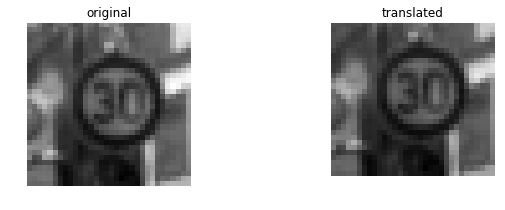

In [9]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    #print(dst.shape)
    return dst

test_img = X_train_normalized[2222]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)


**Random Scaling:**

shape in/out: (32, 32, 1) (32, 32, 1)


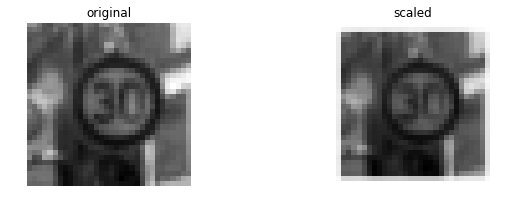

In [10]:
def random_scaling(img):   
    rows,cols,_ = img.shape
    
    p = 5

    # transform limits
    px = np.random.randint(-p,p)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    #print(dst.shape)
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

**Random Brightness:**

shape in/out: (32, 32, 1) (32, 32, 1)


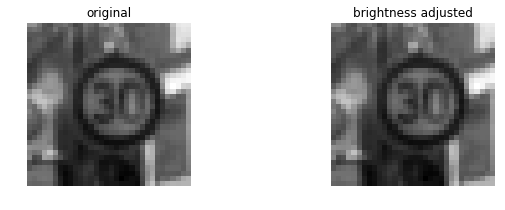

In [11]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    #print(dst.shape)
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

**Data Augmentation Step:**

In [12]:
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples + np.random.randint(200,400)):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            #print(new_img.shape)
            new_img = random_translate(random_scaling(random_brightness(new_img)))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)



X, y shapes: (34799, 32, 32, 1) (34799,)
0 : 1 : 2 : 3 : 4 : 5 : 6 : 7 : 8 : 9 : 10 : 11 : 12 : 13 : 14 : 15 : 16 : 17 : 18 : 19 : 20 : 21 : 22 : 23 : 24 : 25 : 26 : 27 : 28 : 29 : 30 : 31 : 32 : 33 : 34 : 35 : 36 : 37 : 38 : 39 : 40 : 41 : 42 : X, y shapes: (54704, 32, 32, 1) (54704,)


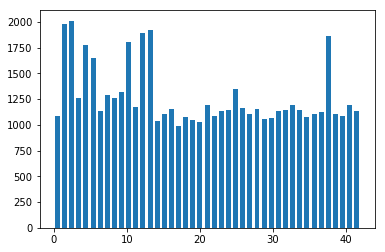

In [13]:
# Visualizing Label data 
# histogram of label frequency

hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [14]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('done')

done


In [15]:
## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_normalized, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))


Old X_train size: 54704
New X_train size: 43763
X_validation size: 10941


### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, num_labels):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros([48]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros([96]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([172]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Max Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Flatten. Input = 2x2x172. Output = 688.
    fc1 = flatten(conv3)
    
    # Fully Connected. Input = 688. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
    fc2 = tf.nn.relu(fc2)

    # Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, num_labels), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([num_labels]))
    logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)
    
    return logits


I began by implementing the same architecture from the LeNet Lab, with few changes. This model worked quite well to begin with (~97% validation accuracy). The layers are set up like this:


**Layer 1: Convolution**
- Convolution layer with a filter of 5x5 with input depth of 1 
- Stride of 1 with VALID padding and output depth of 48
- Input size: 32x32x1
- Output size: 28x28x48

**Layer 2: Max Pooling**
- Max Pooling layer with a kernel of 2x2 
- Stride of 2 with VALID padding depth is 48
- Input size: 28x28x48
- Output size: 14x14x48

**Layer 3: Convolution**

- Convolution layer with a filter of 5x5 with input depth of 48 
- Stride of 1 with VALID padding and output depth of 96
- Input size: 14x14x48
- Output size: 10x10x96

**Layer 4: Max Pooling**

- Max Pooling layer with a kernel of 2x2 
- Stride of 2 with VALID padding depth is 96
- Input size: 10x10x96
- Output size: 5x5x96

**Layer 5: Convolution**

- Convolution layer with a filter of 3x3 with input depth of 96 
- Stride of 1 with VALID padding and output depth of 172
- Input size: 5x5x96
- Output size: 3x3x172

**Layer 6: Max Pooling**

- Max Pooling layer with a kernel of 2x2 
- Stride of 1 with VALID padding depth is 172
- Input size: 3x3x172
- Output size: 2x2x172

**Layer 7: Flatten**

- Input size: 2x2x172
- Output size: 1x688

**Layer 8: Fully Connected**

- Input size: 688
- Output size: 84

**Layer 9: Fully Connected**

- Input size: 84
- Output size: 43

In [17]:
import tensorflow as tf

tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
# Training the model

EPOCHS = 100
BATCH_SIZE = 128

rate = 0.001

logits = LeNet(x,n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels =  one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})    
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.946
Test Accuracy = 0.785

EPOCH 2 ...
Validation Accuracy = 0.971
Test Accuracy = 0.854

EPOCH 3 ...
Validation Accuracy = 0.982
Test Accuracy = 0.833

EPOCH 4 ...
Validation Accuracy = 0.985
Test Accuracy = 0.827

EPOCH 5 ...
Validation Accuracy = 0.980
Test Accuracy = 0.844

EPOCH 6 ...
Validation Accuracy = 0.989
Test Accuracy = 0.850

EPOCH 7 ...
Validation Accuracy = 0.990
Test Accuracy = 0.874

EPOCH 8 ...
Validation Accuracy = 0.973
Test Accuracy = 0.867

EPOCH 9 ...
Validation Accuracy = 0.983
Test Accuracy = 0.850

EPOCH 10 ...
Validation Accuracy = 0.994
Test Accuracy = 0.878

EPOCH 11 ...
Validation Accuracy = 0.990
Test Accuracy = 0.888

EPOCH 12 ...
Validation Accuracy = 0.985
Test Accuracy = 0.818

EPOCH 13 ...
Validation Accuracy = 0.987
Test Accuracy = 0.885

EPOCH 14 ...
Validation Accuracy = 0.988
Test Accuracy = 0.866

EPOCH 15 ...
Validation Accuracy = 0.994
Test Accuracy = 0.894

EPOCH 16 ...
Validation Accuracy = 0

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))


Test Set Accuracy = 0.959


## Test Set Accuracy of 95.9%....!!!

I used the Adam optimizer (already implemented in the LeNet lab). The final settings used were:

- batch size: 128
- epochs: 100
- learning rate: 0.001
- mu: 0
- sigma: 0.1

My approach was a little of both trail and error and educated guesses. I started with pre-defined architectures (LeNet) and almost all of the tweaking from there was a process of trial and error. Thankfully, my guesses were educated thanks to working through the Tensorflow and LeNet labs.


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

To test the model on new images I collected a few images from the internet and noticed that they all were of different sizes and also the were colored images. Since the model only takes a 32x32x1 image as input i scaled these test images to 32x32 px and then converted them into grayscale images. Now I could test these images with the trained model.

### Load and Output the Images

In [23]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('done')

done


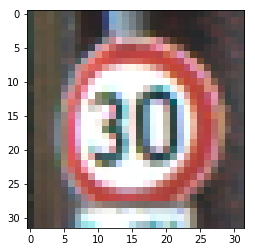

In [26]:
image = cv2.imread("my_traffic_data/00001.jpg")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))


(12, 32, 32, 1)


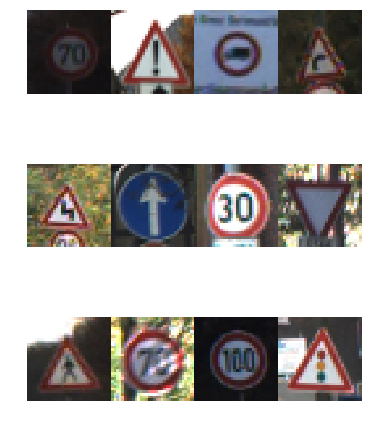

In [27]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(3,4, figsize=(6,8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('my_traffic_data/*jpg')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.array(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [28]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [4, 18, 16, 20, 21, 35, 1, 13, 27, 4, 7, 26]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 1.000


And.........

It does a pretty good job in classifying the test images.

### Analyze Performance

Below I have visualized the Softmax Probabilities for each image I found on the web.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

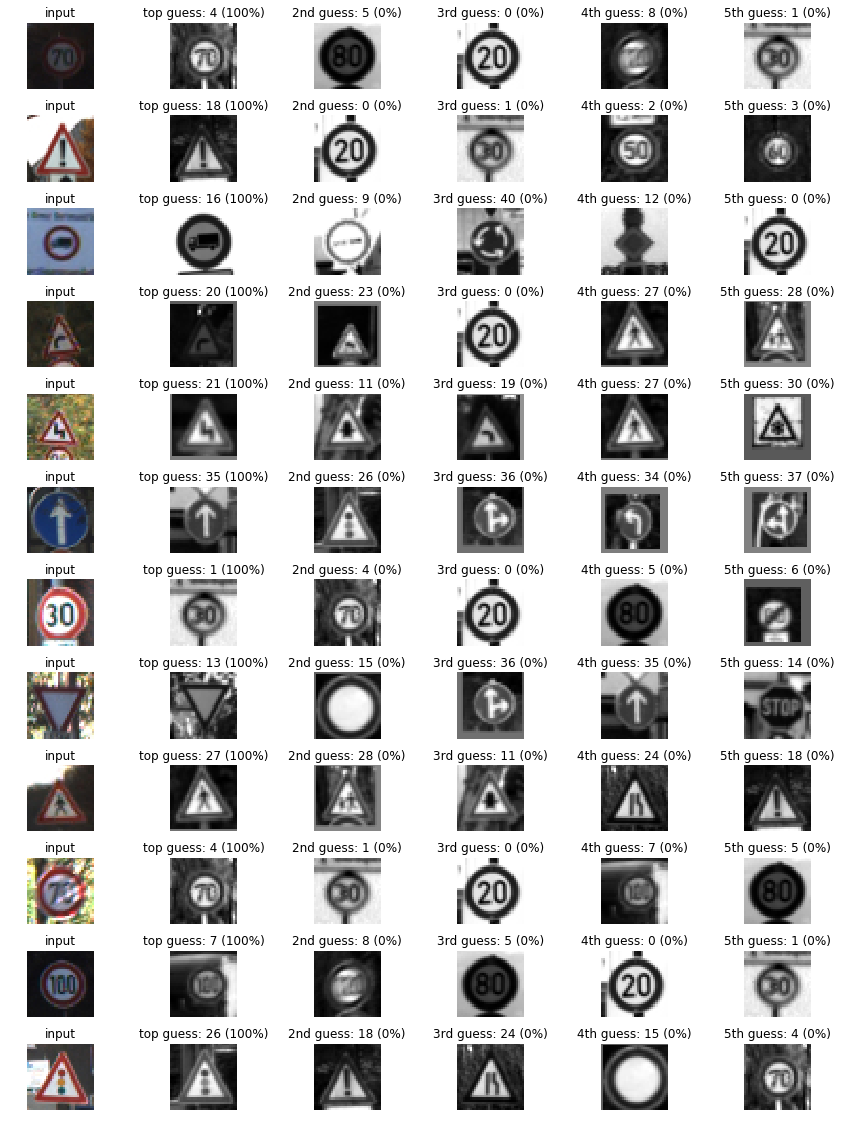

In [47]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),6, figsize=(15, 20))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].axis('off')
        axs[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[6*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_validation == guess4)[0]
        axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_validation[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(guess4, 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_validation == guess5)[0]
        axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_validation[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(guess5, 100*my_top_k[0][i][4]))

In [50]:
import csv
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

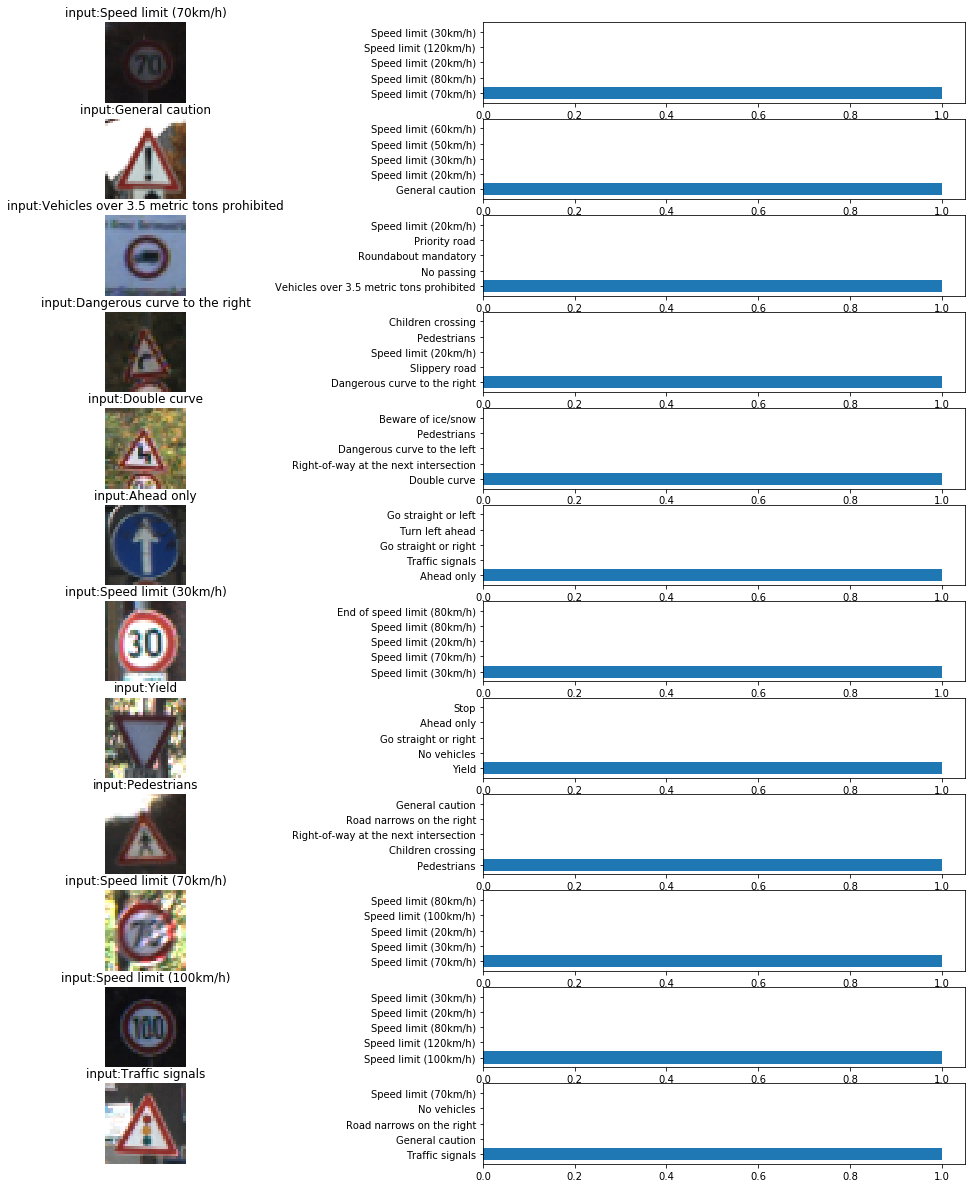

In [58]:
plt.figure(figsize=(19, 21))
for i in range(12):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(cv2.cvtColor(my_images[i], cv2.COLOR_BGR2RGB))
    title = "input:" + str(signs_class[my_labels[i]])
    plt.title(title)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), my_top_k.values[i, :])
    labs=[signs_class[j] for j in my_top_k.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

In [48]:
print(my_top_k)

TopKV2(values=array([[  1.00000000e+00,   8.91039016e-22,   7.72811461e-22,
          5.91180440e-22,   8.42595523e-23],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.04151382e-24,   4.51272560e-29,
          6.14938299e-32,   0.00000000e+00],
       [  1.00000000e+00,   1.62823059e-18,   3.06600794e-23,
          1.59605162e-23,   4.14277484e-26],
       [  1.00000000e+00,   1.01566478e-18,   4.60269748e-21,
          2.90541112e-21,   3.16893756e-23],
       [  1.00000000e+00,   4.01088186e-23,   2.33302063e-23,
          6.07642082e-24,   1.51852441e-24],
       [  1.00000000e+00,   3.59711304e-24,   2.10866445e-24,
          1.14075453e-32,   7.79278092e-34],
       [  1.00000000e+00,   2.33679612e-24,   4.30604424e-27,
          4.79919498e-28,   7.09228216e-30],
       [  1.00000000e+00,   1.79689539e-21,   7.74114807e-24,
          3.43091909e-26,   1.81443447e-26],
       [  1.00000000e+0

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.